<h1><font color='red'>Olympics data - Pivot Table to Show Golden Medals Won by Age and Gender</font></h1>
## Join, groupby and pivot table in Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
summer_games = pd.read_csv("summer_games.csv")
winter_games = pd.read_csv("winter_games.csv")
athletes = pd.read_csv("athletes.csv")
countries = pd.read_csv("countries.csv")

In [3]:
display(athletes.head(2))
display(summer_games.head(2))
display(winter_games.head(2))
display(countries.head(2))

,id,name,gender,age,height,weight
0,51,Nstor Abad Sanjun,M,23,167.0,64.0
1,55,Antonio Abadia Beci,M,26,170.0,65.0


,sport,event,year,athlete_id,country_id,bronze,silver,gold
0,Gymnastics,Gymnastics Men's Individual All-Around,2016-01-01,51,173,NaN,NaN,NaN
1,Gymnastics,Gymnastics Men's Floor Exercise,2016-01-01,51,173,NaN,NaN,NaN


,sport,event,year,athlete_id,country_id,bronze,silver,gold
0,Alpine Skiing,Alpine Skiing Women's Slalom,2014-01-01,126,89,NaN,NaN,NaN
1,Alpine Skiing,Alpine Skiing Women's Super G,2014-01-01,463,102,NaN,NaN,NaN


,id,country,region
0,1,AFG - Afghanistan,ASIA (EX. NEAR EAST)
1,2,ALB - Albania,EASTERN EUROPE


In [4]:
summer_games['season'] = 'Summer'
winter_games['season'] = 'Winter'
all_games = pd.concat([summer_games, winter_games])

In [5]:
columns_need = ['athlete_id','gold', 'season'] 
west_games = all_games.merge(countries, left_on='country_id', right_on='id')\
                      .loc[lambda df: df.region.str.contains('WESTERN', na=False), columns_need]

In [6]:
west_games.head()

,athlete_id,gold,season
0,51,NaN,Summer
1,51,NaN,Summer
2,51,NaN,Summer
3,51,NaN,Summer
4,51,NaN,Summer


In [7]:
def get_age_group(df):
    if (df['age'] >=26) & (df['gender'] == 'M'):
        return 'Male Age 26+'
    elif (df['age'] >=26) & (df['gender'] == 'F'):
        return 'Female Age 26+'
    elif (df['age'] <26) & (df['gender'] == 'M'):
        return 'Male Age 13-25'
    elif (df['age'] <26) & (df['gender'] == 'F'):
        return 'Female Age 13-25'

age_group_tb = athletes.merge(west_games, left_on='id', right_on ='athlete_id')\
        .assign(demographic_group = lambda df: df.apply(get_age_group, axis=1))

In [8]:
age_group_tb.head()

,id,name,gender,age,height,weight,athlete_id,gold,season,demographic_group
0,51,Nstor Abad Sanjun,M,23,167.0,64.0,51,NaN,Summer,Male Age 13-25
1,51,Nstor Abad Sanjun,M,23,167.0,64.0,51,NaN,Summer,Male Age 13-25
2,51,Nstor Abad Sanjun,M,23,167.0,64.0,51,NaN,Summer,Male Age 13-25
3,51,Nstor Abad Sanjun,M,23,167.0,64.0,51,NaN,Summer,Male Age 13-25
4,51,Nstor Abad Sanjun,M,23,167.0,64.0,51,NaN,Summer,Male Age 13-25


In [9]:
grouped_df = age_group_tb.groupby(['season', 'demographic_group'])['gold']\
                         .count().rename('golds').sort_values(ascending=False).reset_index()

In [10]:
grouped_df

,season,demographic_group,golds
0,Winter,Male Age 26+,13
1,Winter,Female Age 26+,8
2,Summer,Male Age 13-25,7
3,Summer,Female Age 13-25,6
4,Summer,Male Age 26+,4
5,Winter,Female Age 13-25,4
6,Winter,Male Age 13-25,4
7,Summer,Female Age 26+,2


# Get the Pivot Table

In [11]:
final_pivot_tb = grouped_df.pivot_table(index='season', columns='demographic_group', values='golds')

In [12]:
final_pivot_tb

demographic_group,Female Age 13-25,Female Age 26+,Male Age 13-25,Male Age 26+
season,,,,
Summer,6,2,7,4
Winter,4,8,4,13


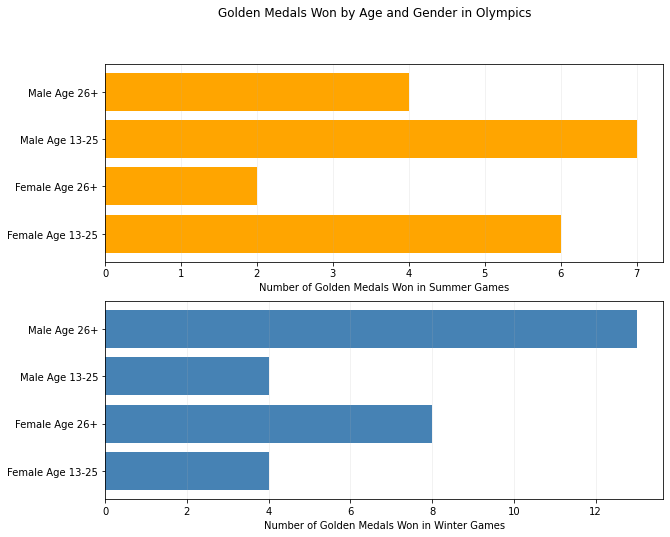

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.suptitle("Golden Medals Won by Age and Gender in Olympics")
color_lst = ['orange', 'steelblue']
y_axis= np.arange(4)
index = 0
for key, group in grouped_df.groupby('season'):
    ax[index].barh(y_axis, group.sort_values('demographic_group')['golds'], color=color_lst[index])
    ax[index].set_yticks(y_axis)
    ax[index].set_yticklabels(group.sort_values('demographic_group')['demographic_group'])
    ax[index].set_xlabel(f'Number of Golden Medals Won in {key} Games')
    ax[index].grid(alpha=0.2, axis='x', which='both')
    index+=1
plt.show()